# Global Power Plant Database

Lets import all the required library

In [12]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [13]:
data= pd.read_csv('database_IND.csv')

In [14]:
pd.set_option('display.max_columns', None)


In [15]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [16]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [17]:
data.shape

(907, 27)

# Data Analysis:

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [19]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Drop all the columns which are not relevent.
country, country_long are just the name, and here we are data only for india, so droping this will not effect on output.

In [20]:
data.drop(['country', 'country_long'], inplace= True, axis= 1)


In [21]:
data.drop(['other_fuel1','other_fuel2', 'other_fuel3', 'wepp_id','url','geolocation_source', 'generation_data_source', 'estimated_generation_gwh','source'], inplace= True, axis= 1)


In [22]:
data.drop(['year_of_capacity_data'], inplace= True, axis= 1)

# Filling null values

In [23]:
data.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

In [24]:
data['generation_gwh_2013'].fillna(value=data['generation_gwh_2013'].median(), inplace= True)
data['generation_gwh_2014'].fillna(value=data['generation_gwh_2014'].median(), inplace= True)
data['generation_gwh_2015'].fillna(value=data['generation_gwh_2015'].median(), inplace= True)
data['generation_gwh_2016'].fillna(value=data['generation_gwh_2016'].median(), inplace= True)
data['generation_gwh_2017'].fillna(value=data['generation_gwh_2017'].median(), inplace= True)

In [25]:
data['latitude'].fillna(value=data['latitude'].mean(), inplace= True)
data['longitude'].fillna(value=data['longitude'].mean(), inplace= True)

In [26]:
data.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2013    907
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

# EDA
# Univariate analysis
Lets plot the distrubution and conuts for targat and feature columns.

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

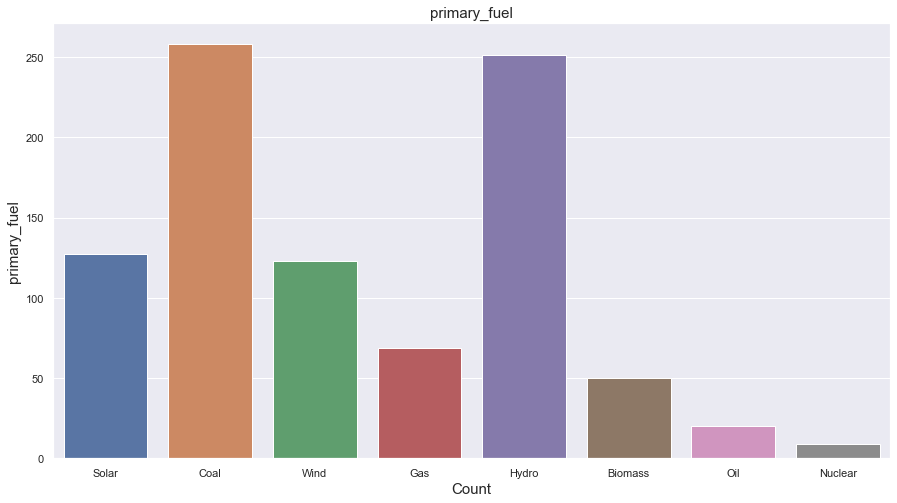

In [27]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
sns.countplot(data['primary_fuel'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('primary_fuel', fontsize=15 )
plt.title('primary_fuel', fontsize=15)

data['primary_fuel'].value_counts()


Here we can see, most of the power plants are using Coal and Hydro as the primary fuel.
Coal having maximum counts, which indicates most of the power generation plant using coal af primary fuel.
Use of solar and wind also considerable.

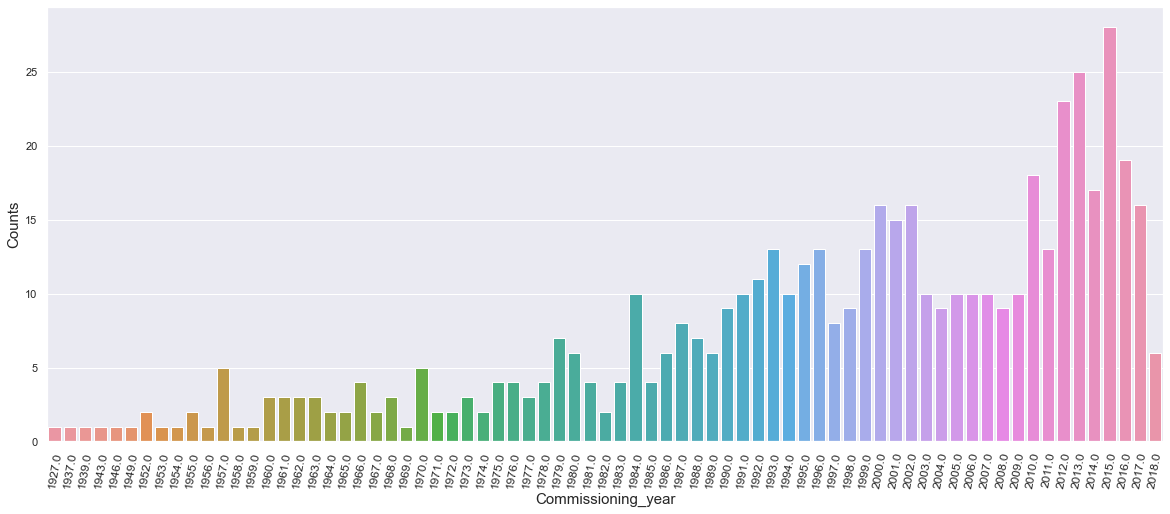

In [28]:
plt.figure(figsize=(20,8))
sns.countplot(data['commissioning_year'])
plt.xlabel('Commissioning_year', fontsize= 15)
plt.ylabel('Counts', fontsize= 15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()


Here we can see first power plant in India starts in 1927.
The count is very low till 1956.
From 1957 to 1983 there is contineous developmet of 3 to 5 power plant every year.
The number increases 1964 with total count of 10.
After 1964 there conutineuos growth in power sector.
In the year 2013 we have maximum number of Power plant, the count is more than 25.

In [29]:
data['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

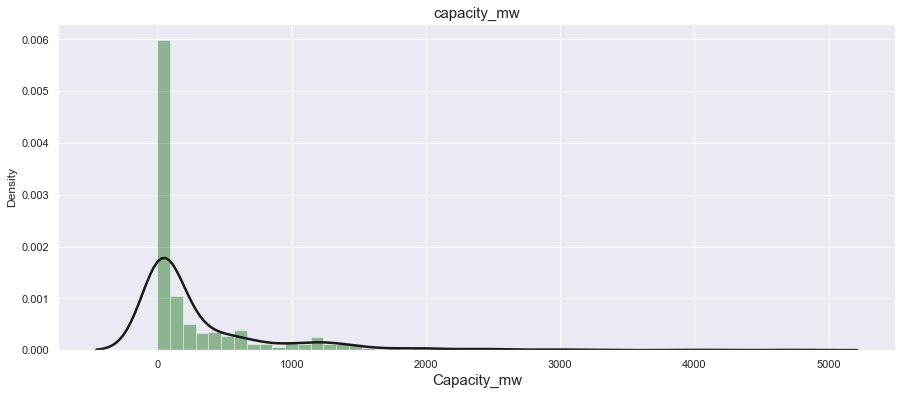

In [30]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,6))

sns.distplot(data['capacity_mw'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('capacity_mw', fontsize=15)
plt.xlabel('Capacity_mw', fontsize=15)
plt.show()

Here we can see the probablity of capacity greater than 1000 is less.
Data is not normaly distributed.
Data having outliers.

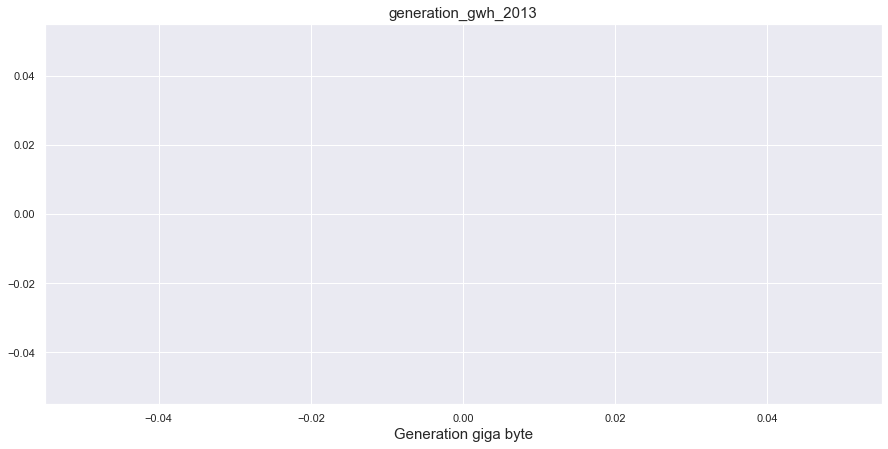

In [31]:
plt.figure(figsize=(15,7))

sns.distplot(data['generation_gwh_2013'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2013', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()


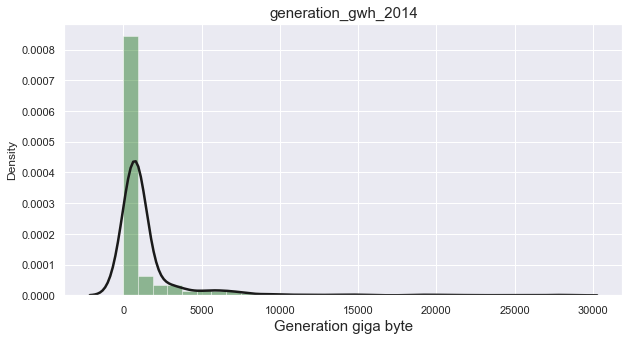

In [32]:
plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2014'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2014', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

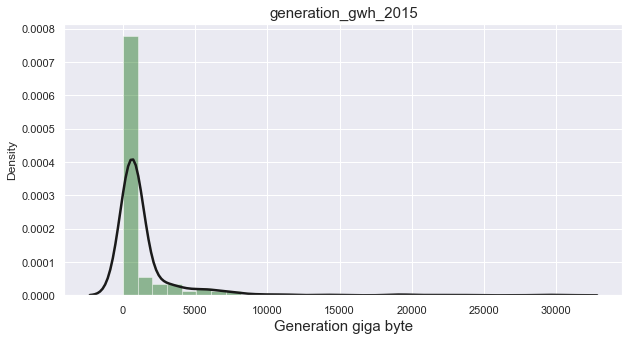

In [33]:
plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2015'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2015', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()


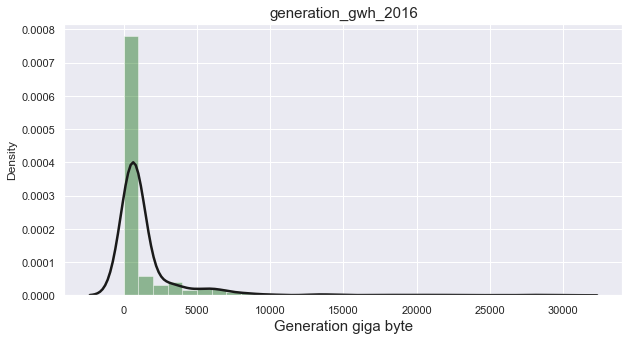

In [34]:
plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2016'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2016', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

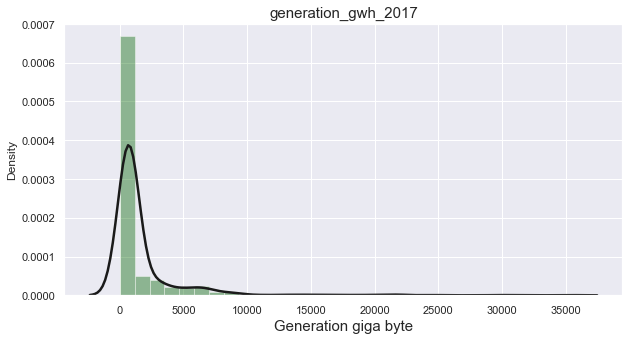

In [35]:
plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2017'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2017', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()


# Bivariate Analysis
In bivariate analysis, we will analyse the features columns aagint target column.

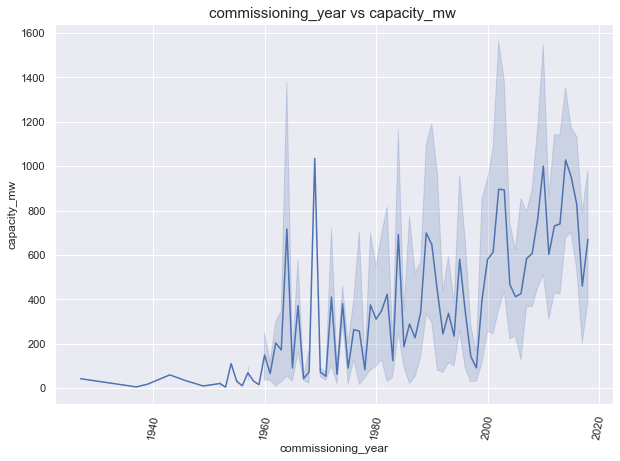

In [36]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='commissioning_year',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('commissioning_year vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

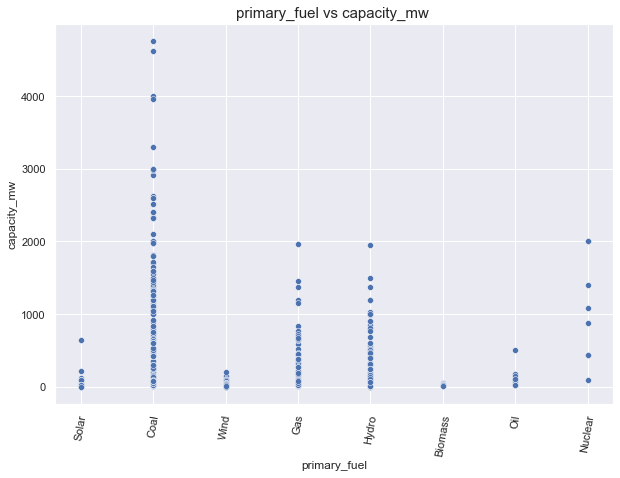

In [37]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data, x='primary_fuel',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('primary_fuel vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

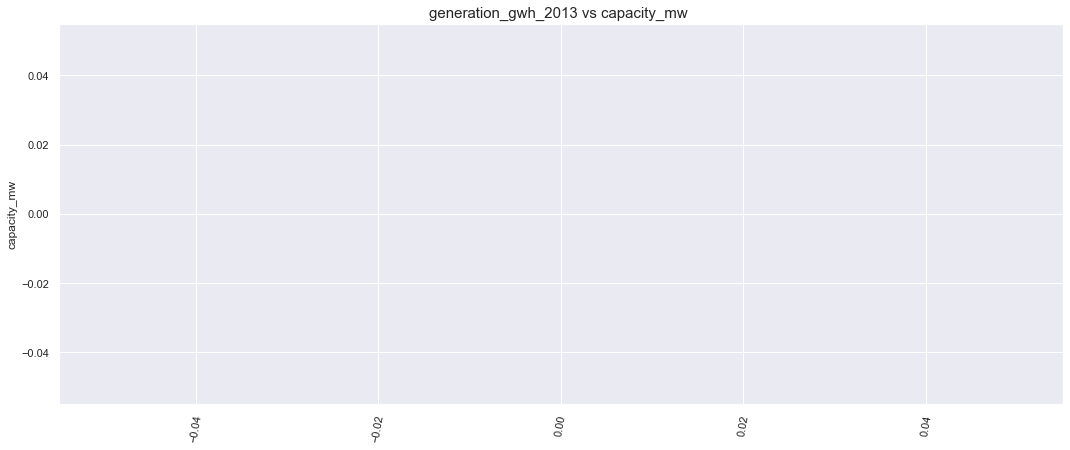

In [38]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='generation_gwh_2013',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2013 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


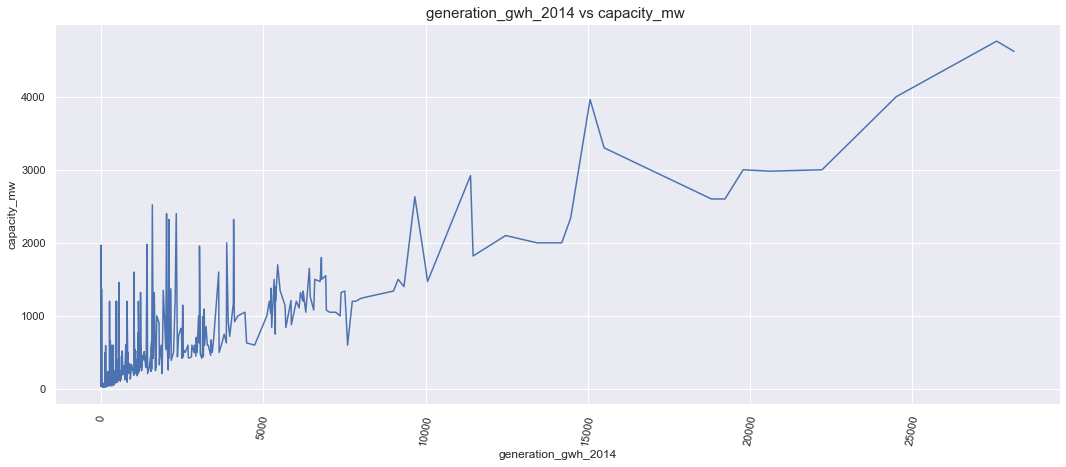

In [39]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='generation_gwh_2014',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

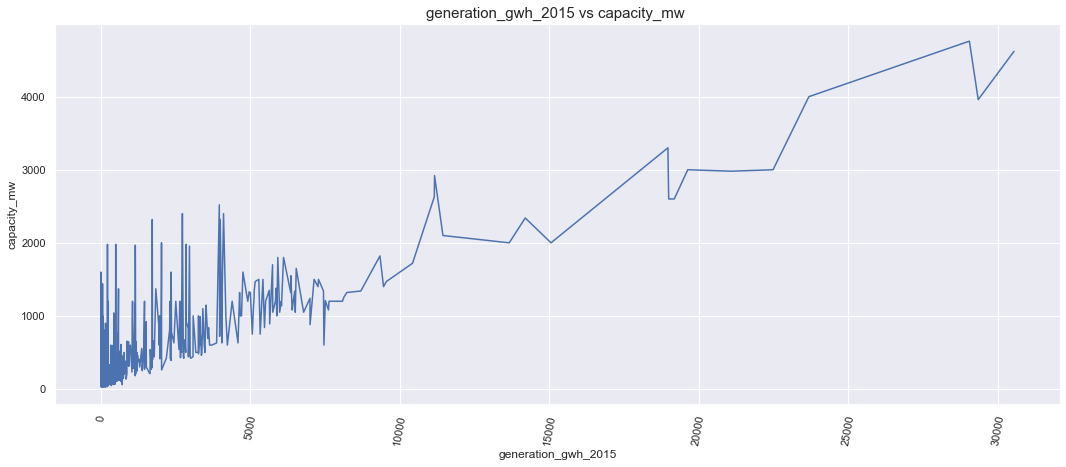

In [40]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='generation_gwh_2015',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2015 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


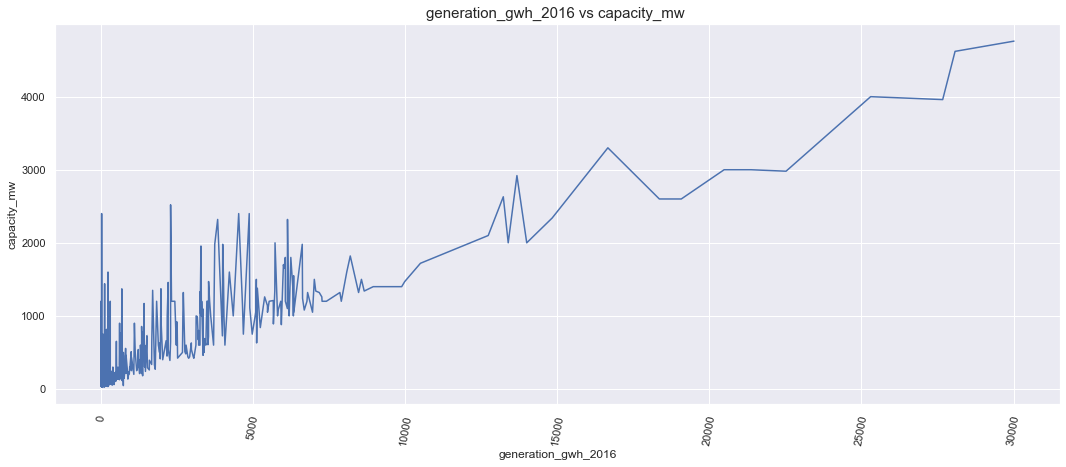

In [41]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='generation_gwh_2016',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2016 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

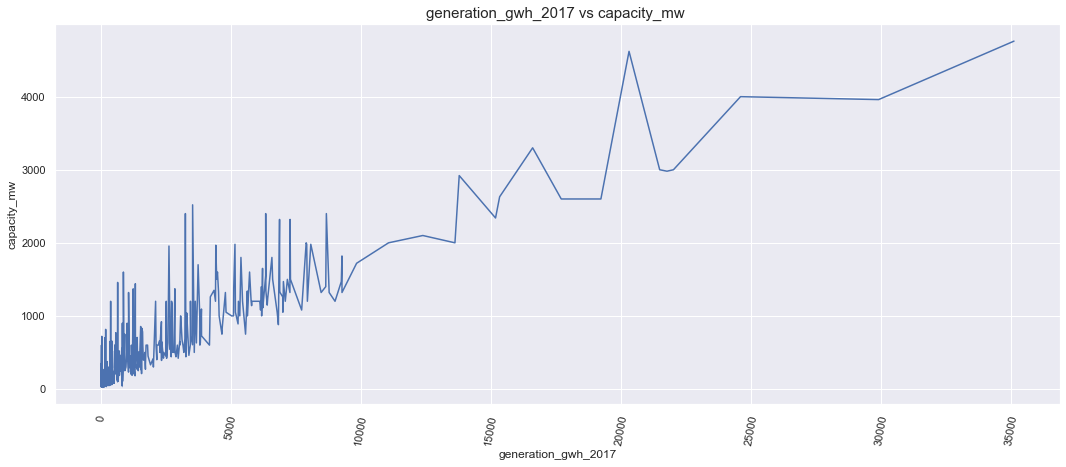

In [42]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='generation_gwh_2017',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2017 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

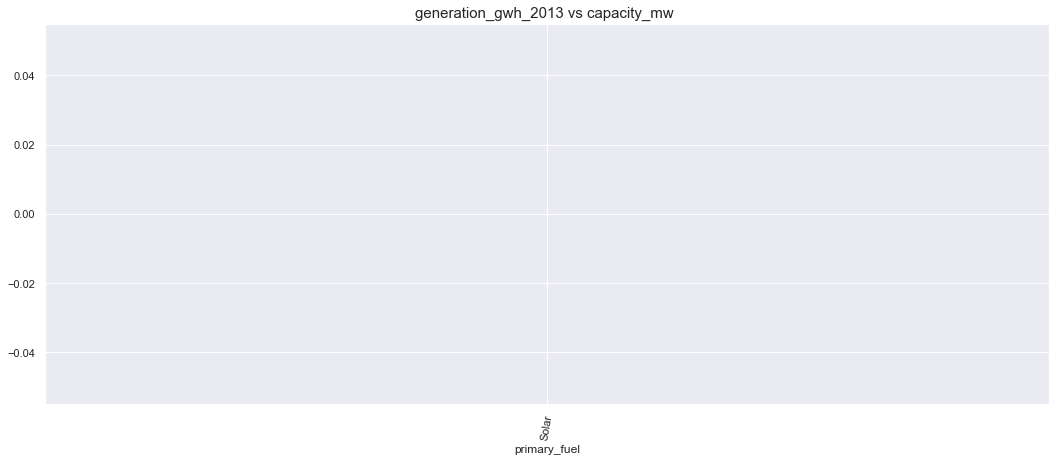

In [43]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='primary_fuel',y='generation_gwh_2013')
locs, labels = plt.xticks()
plt.title('generation_gwh_2013 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

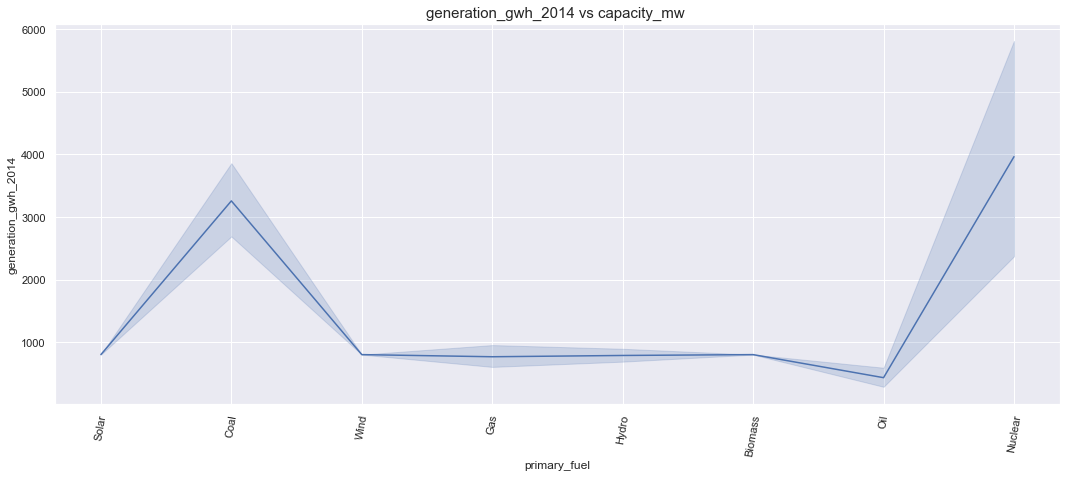

In [44]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='primary_fuel',y='generation_gwh_2014')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

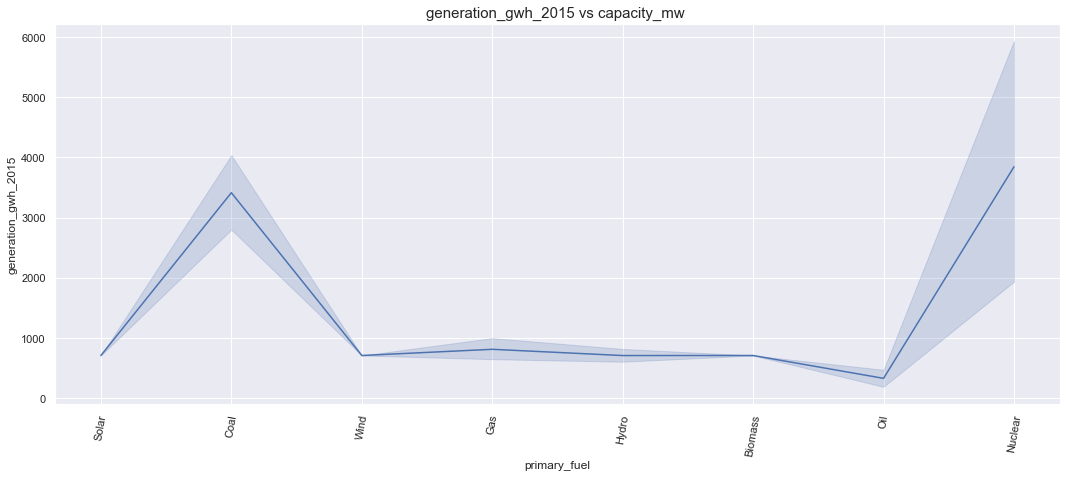

In [45]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='primary_fuel',y='generation_gwh_2015')
locs, labels = plt.xticks()
plt.title('generation_gwh_2015 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


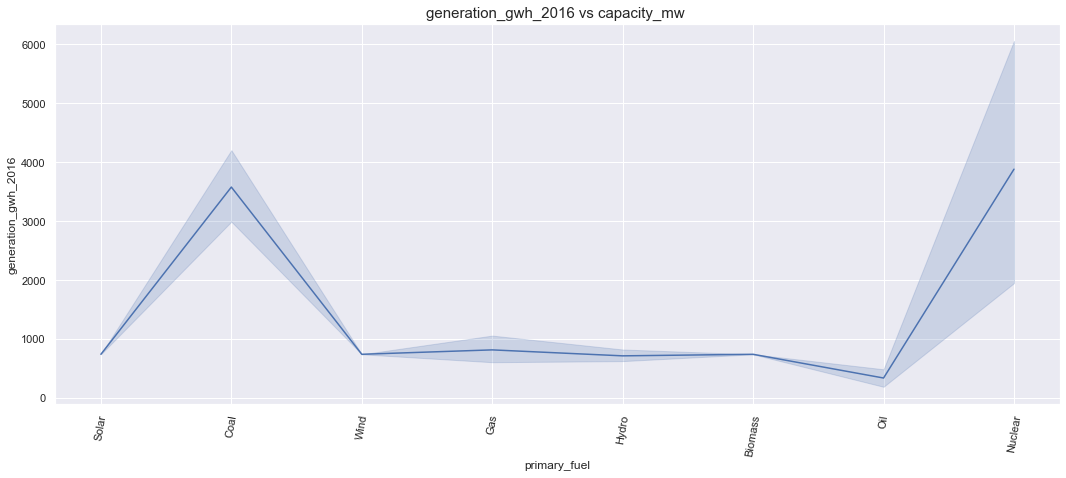

In [46]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='primary_fuel',y='generation_gwh_2016')
locs, labels = plt.xticks()
plt.title('generation_gwh_2016 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

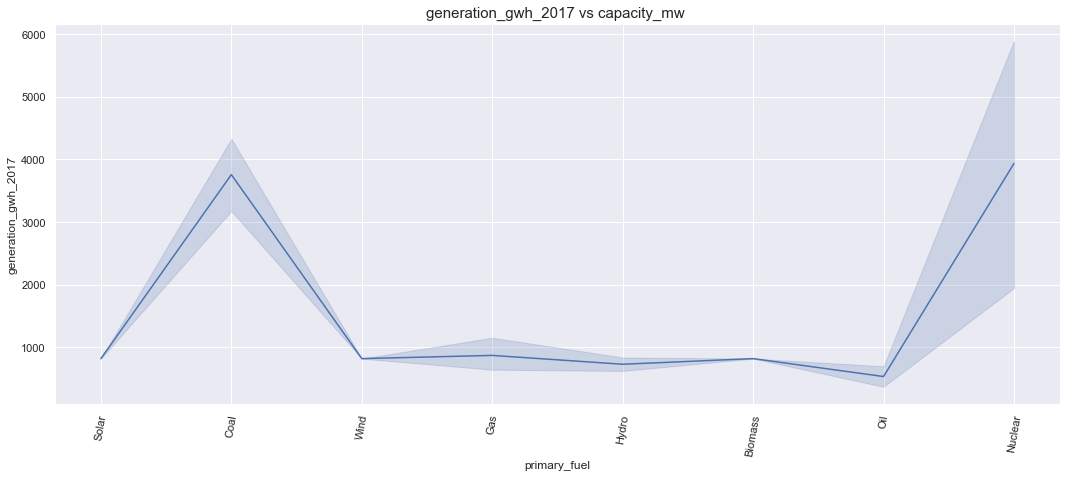

In [47]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='primary_fuel',y='generation_gwh_2017')
locs, labels = plt.xticks()
plt.title('generation_gwh_2017 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


In [48]:
data.head(2)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,NaN,801.123775,711.181225,737.20545,817.97725,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,NaN,801.123775,711.181225,737.20545,817.97725,NaN,NaN


# Multivariate analysis

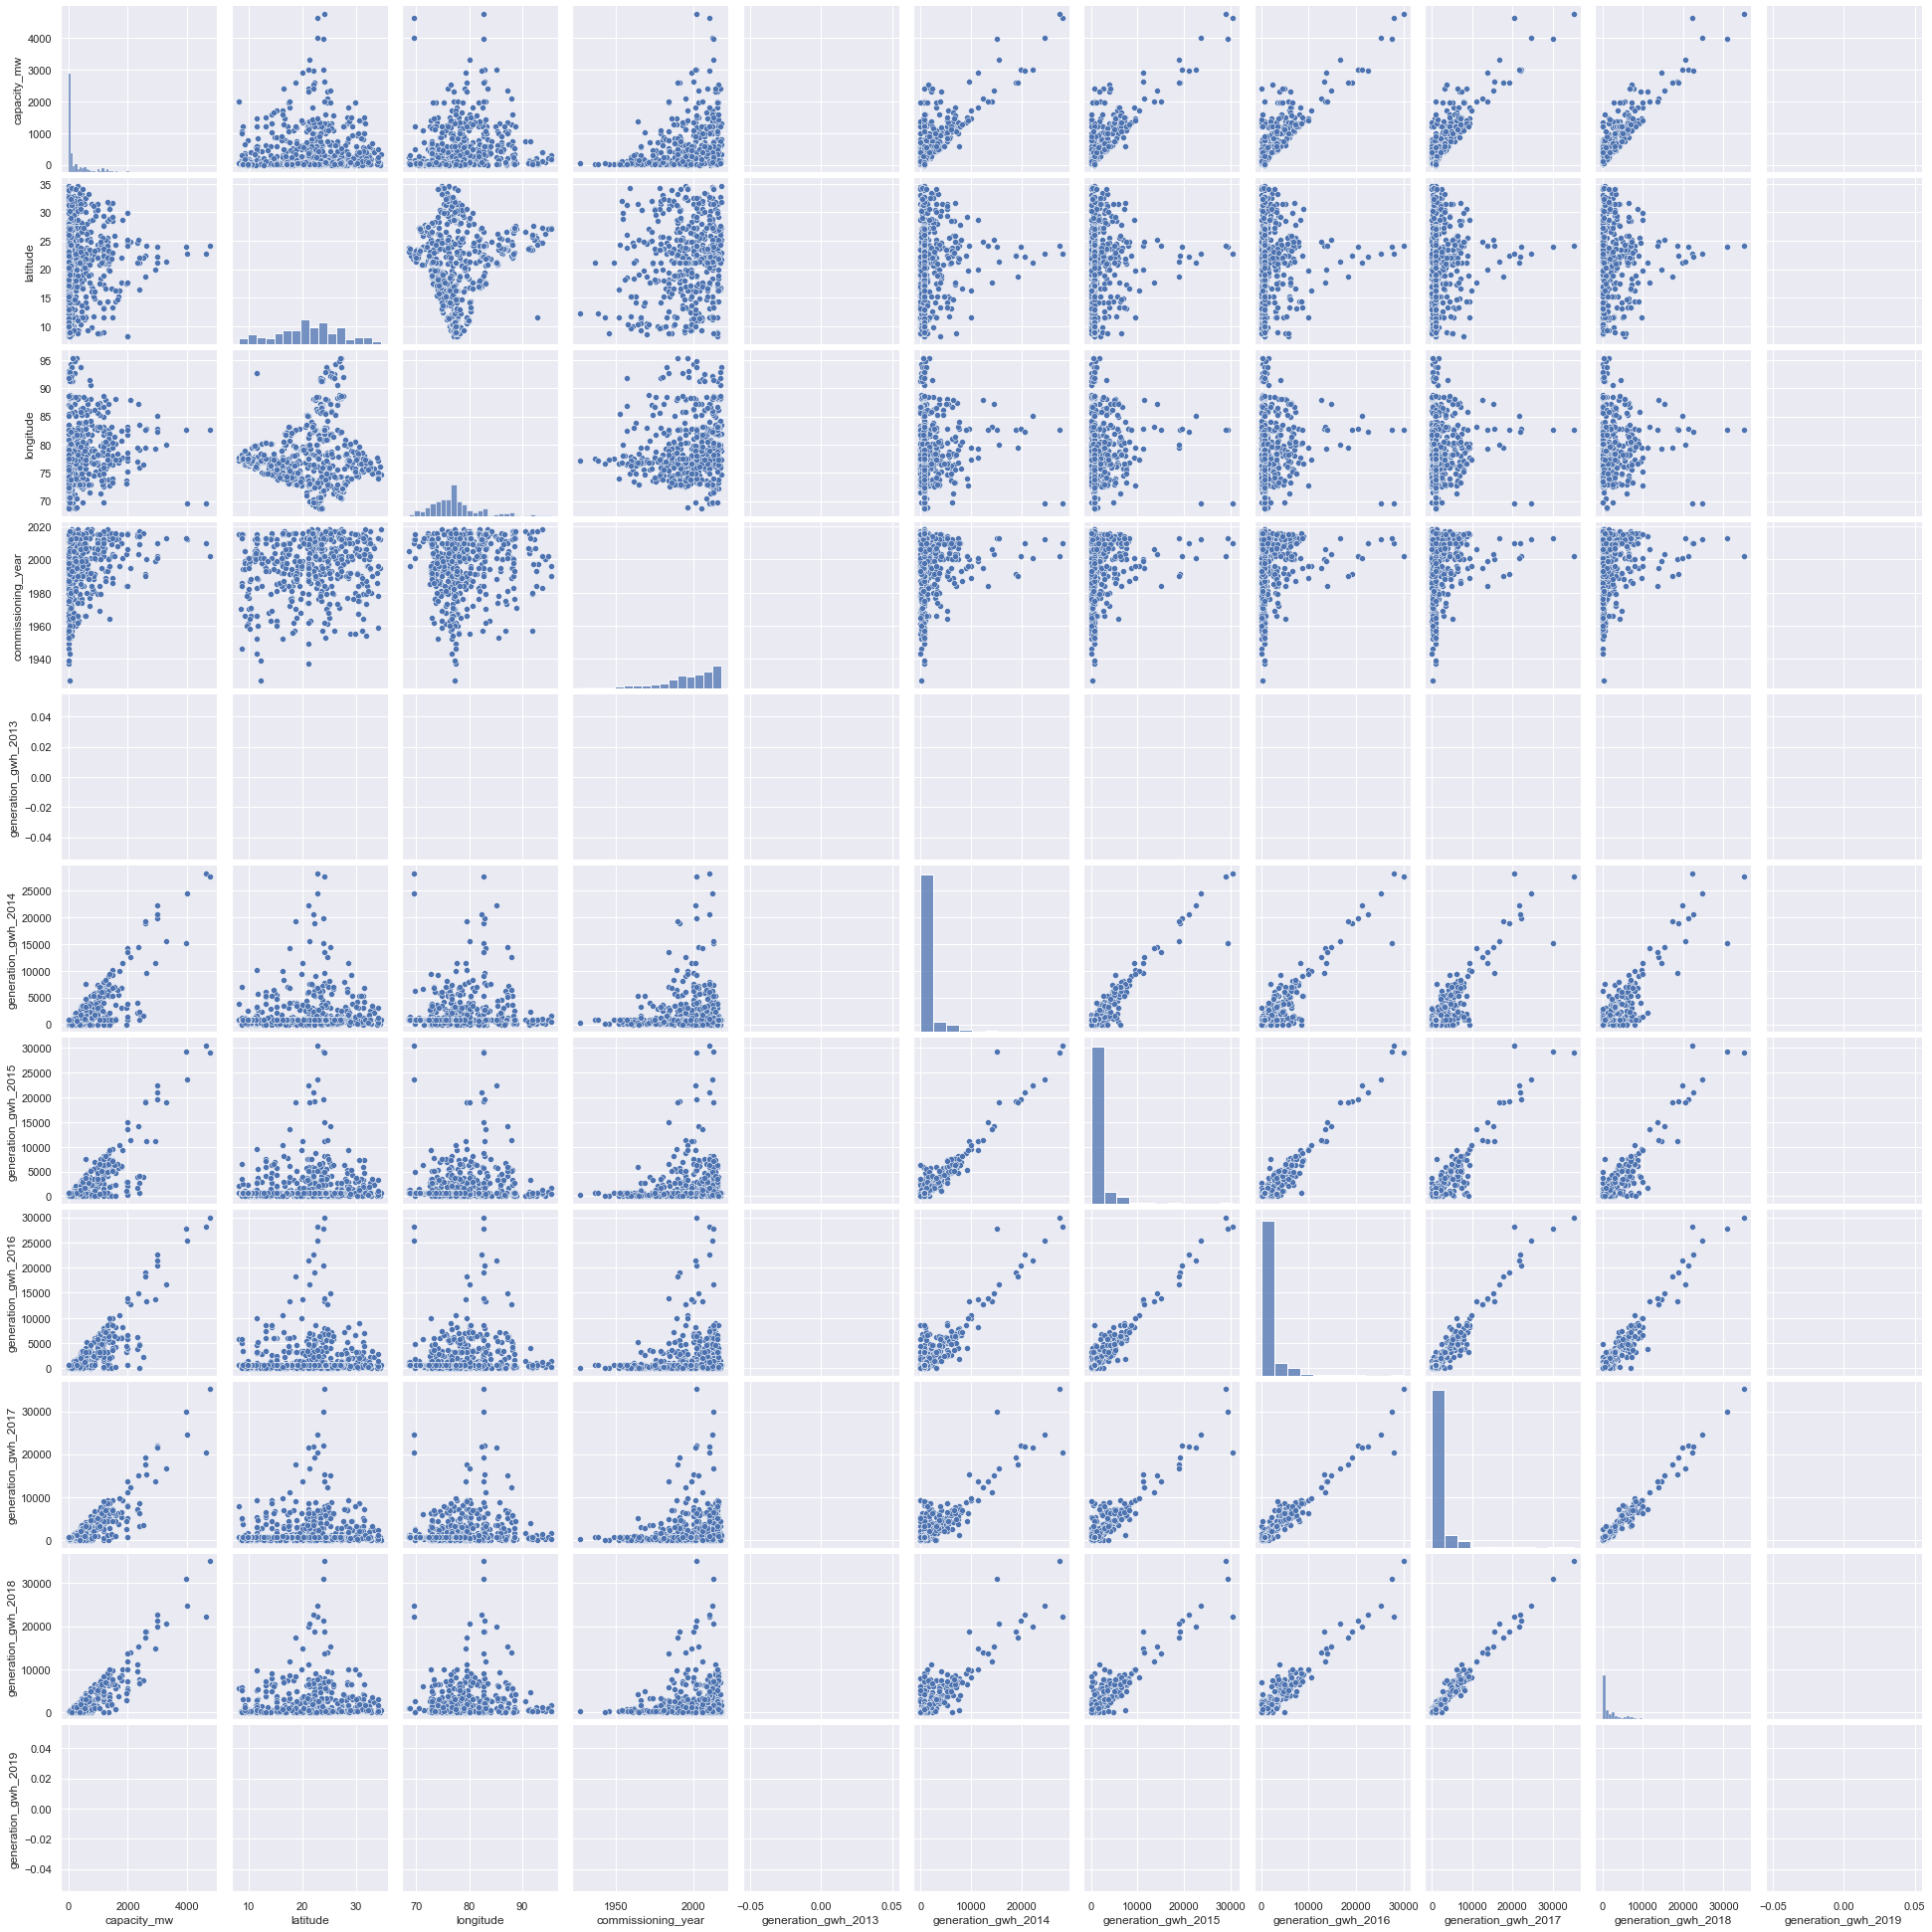

In [49]:
sns.pairplot(data)


# Data Processing
Here we can see, name, gppd_idnr, owner, commissioning_year are not playing good role, we can drop these columns.

In [50]:
data.drop(['name','gppd_idnr','owner','commissioning_year'], axis=1, inplace= True)

# Encoding Target columns

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['primary_fuel']=le.fit_transform(data['primary_fuel'])

In [52]:
data.head(3)

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,NaN,801.123775,711.181225,737.20545,817.97725,NaN,NaN
1,98.0,24.7663,74.6090,1,NaN,801.123775,711.181225,737.20545,817.97725,NaN,NaN
2,39.2,21.9038,69.3732,7,NaN,801.123775,711.181225,737.20545,817.97725,NaN,NaN


In [53]:
data.corr()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
capacity_mw,1.000000,0.050984,0.195882,-0.380395,NaN,0.793497,0.819676,0.853008,0.868338,0.901918,NaN
latitude,0.050984,1.000000,0.036362,-0.010204,NaN,0.058594,0.053869,0.047677,0.057897,0.041414,NaN
longitude,0.195882,0.036362,1.000000,-0.347948,NaN,0.104649,0.121513,0.143459,0.151712,0.050548,NaN
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,NaN,-0.240656,-0.249304,-0.259708,-0.263599,-0.421518,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.793497,0.058594,0.104649,-0.240656,NaN,1.000000,0.963719,0.935067,0.904075,0.887050,NaN
generation_gwh_2015,0.819676,0.053869,0.121513,-0.249304,NaN,0.963719,1.000000,0.973231,0.940229,0.927664,NaN
generation_gwh_2016,0.853008,0.047677,0.143459,-0.259708,NaN,0.935067,0.973231,1.000000,0.973909,0.961997,NaN
generation_gwh_2017,0.868338,0.057897,0.151712,-0.263599,NaN,0.904075,0.940229,0.973909,1.000000,0.985604,NaN
generation_gwh_2018,0.901918,0.041414,0.050548,-0.421518,NaN,0.887050,0.927664,0.961997,0.985604,1.000000,NaN


<AxesSubplot:>

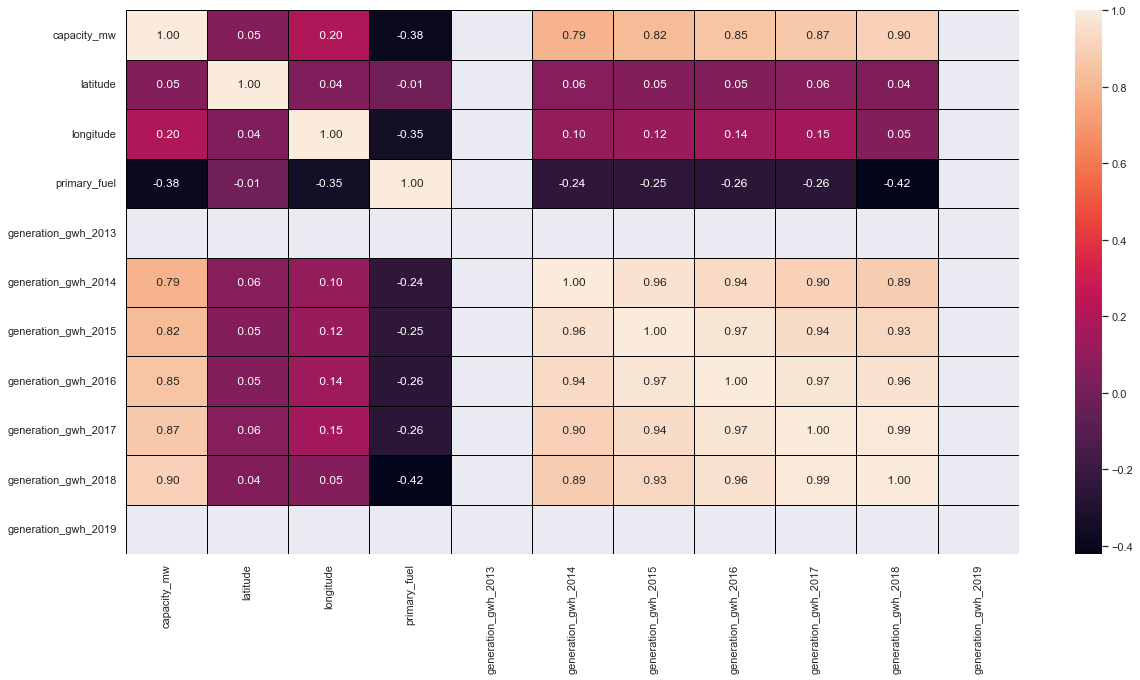

In [54]:
plt.figure(figsize=(20,10))

sns.heatmap(data.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )


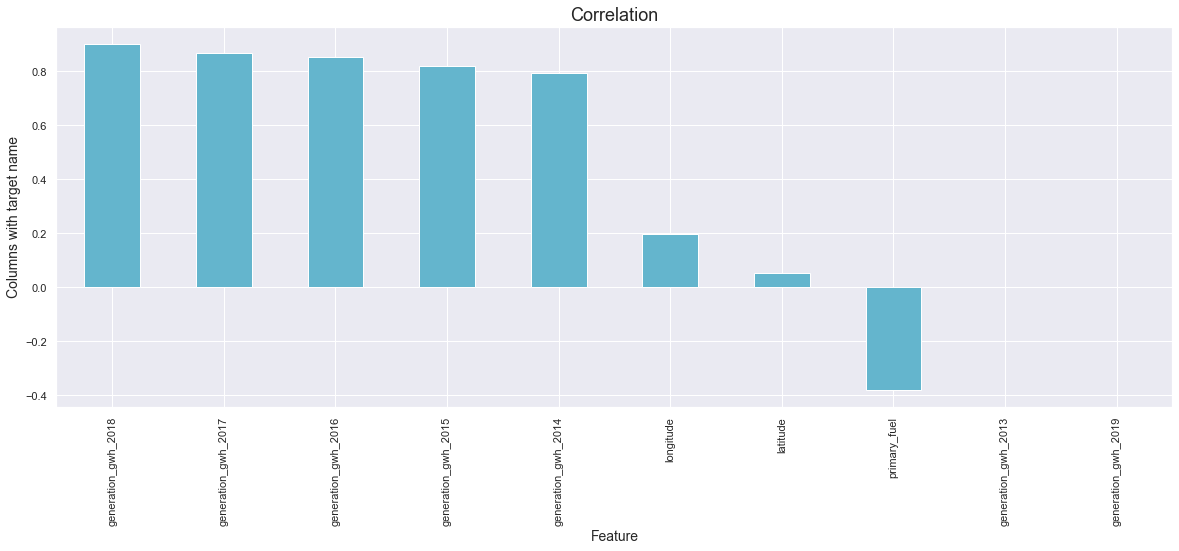

In [55]:
plt.figure(figsize=(20,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

# Checking outliers

<AxesSubplot:>

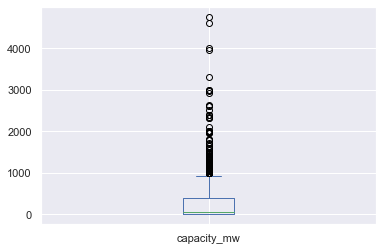

In [56]:
data['capacity_mw'].plot.box()

<AxesSubplot:>

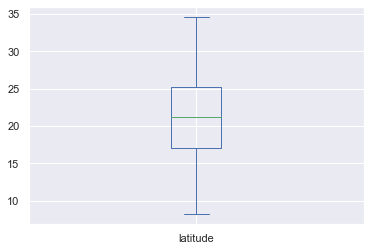

In [57]:
data['latitude'].plot.box()

<AxesSubplot:>

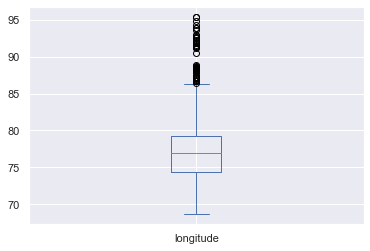

In [58]:
data['longitude'].plot.box()


<AxesSubplot:>

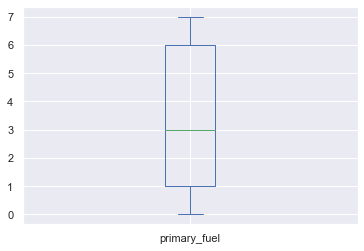

In [59]:
data['primary_fuel'].plot.box()

<AxesSubplot:>

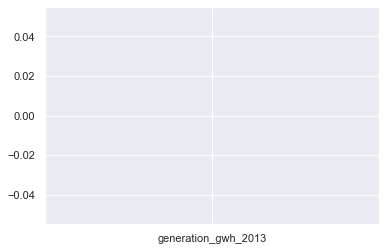

In [60]:
data['generation_gwh_2013'].plot.box()

<AxesSubplot:>

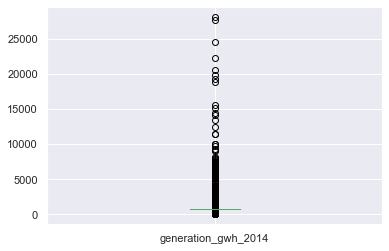

In [61]:
data['generation_gwh_2014'].plot.box()

<AxesSubplot:>

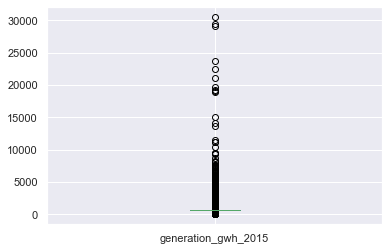

In [62]:
data['generation_gwh_2015'].plot.box()

<AxesSubplot:>

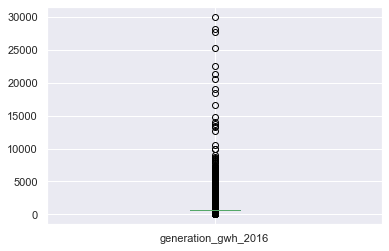

In [63]:
data['generation_gwh_2016'].plot.box()


<AxesSubplot:>

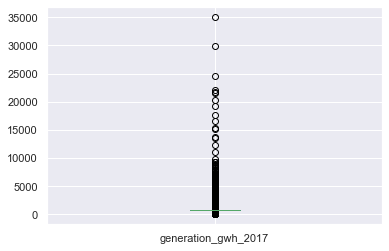

In [64]:
data['generation_gwh_2017'].plot.box()

# Removing Outliers

In [65]:
from scipy.stats import zscore
z= np.abs(zscore(data))


In [66]:
threshold= 3 
print(np.where(z>3))

(array([ 15,  15,  15,  15, 143, 143, 143, 143, 143, 147, 158, 179, 183,
       209, 209, 209, 209, 209, 244, 308, 308, 308, 308, 308, 323, 333,
       340, 360, 363, 364, 364, 364, 364, 364, 375, 416, 427, 482, 493,
       493, 493, 493, 493, 494, 494, 494, 494, 494, 499, 519, 532, 546,
       577, 623, 638, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657,
       695, 695, 695, 695, 695, 721, 721, 721, 721, 724, 724, 724, 724,
       726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 788, 808,
       808, 808, 808, 808, 818, 847, 880, 880, 880, 880, 880], dtype=int64), array([0, 6, 7, 8, 0, 5, 6, 7, 8, 0, 5, 2, 2, 0, 5, 6, 7, 8, 2, 0, 5, 6,
       7, 8, 2, 2, 2, 2, 0, 0, 5, 6, 7, 8, 0, 2, 2, 0, 0, 5, 6, 7, 8, 0,
       5, 6, 7, 8, 2, 2, 5, 2, 2, 5, 2, 0, 5, 6, 7, 8, 0, 5, 6, 7, 8, 0,
       5, 6, 7, 8, 5, 6, 7, 8, 5, 6, 7, 8, 0, 5, 6, 7, 8, 0, 0, 5, 6, 7,
       8, 0, 0, 5, 6, 7, 8, 2, 2, 0, 5, 6, 7, 8], dtype=int64))


In [67]:
df=data[(z<3).all(axis=1)]
print(data.shape)
print(df.shape)


(907, 11)
(0, 11)


In [68]:
Loss_percentage=(908-866)/908*100
print(Loss_percentage)


4.6255506607929515


In [69]:
df.shape

(0, 11)

In [70]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019


# Removing skewness

In [71]:
df.skew()

capacity_mw           NaN
latitude              NaN
longitude             NaN
primary_fuel          NaN
generation_gwh_2013   NaN
generation_gwh_2014   NaN
generation_gwh_2015   NaN
generation_gwh_2016   NaN
generation_gwh_2017   NaN
generation_gwh_2018   NaN
generation_gwh_2019   NaN
dtype: float64

In [73]:
X=pd.DataFrame(data=x)


# VIF calculation

In [75]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [76]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019'],
      dtype='object')

In [77]:
dfx=pd.DataFrame(data=X, columns=['latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'])

In [78]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)